In [11]:
import pandas as pd
import numpy as np
import docx
import jieba


In [12]:
file1=docx.Document('1.docx')
file2=docx.Document('2.docx')
file3=docx.Document('3.docx')


In [13]:
len(file1.paragraphs)
len(file2.paragraphs)
len(file3.paragraphs)


1147

In [14]:
d=[]
for  i in file1.paragraphs:
    d.append(list(jieba.cut(i.text.strip())))
for i in file2.paragraphs:
     d.append(list(jieba.cut(i.text.strip())))
for i in  file3.paragraphs:
    d.append(list(jieba.cut(i.text.strip())))

d_word = [i for item in d for i in item]


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\TANGXI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.584 seconds.
Prefix dict has been built successfully.


In [15]:
len(np.unique(d_word))

11700

In [16]:

stopwords = [line.strip() for line in open(r'cn_stopwords.txt',encoding='UTF-8').readlines()]
q=['\u3000','（','）','\n',' ','']
for i in q:
    stopwords.append(i)
for i in d_word:
    if i in stopwords:
        d_word.remove(i)

In [17]:
len(np.unique(d_word))

11655

In [18]:
word_count={}
for word in d_word:
    word_count[word] = word_count.get(word, 0) + 1
dic1SortList = sorted(word_count.items(),key = lambda x:x[1],reverse = True)
dic1SortList

[('建设', 1939),
 ('发展', 1900),
 ('生态', 1802),
 ('长江', 1686),
 ('\u3000', 1556),
 ('推进', 1531),
 ('绿色', 1373),
 ('加强', 1354),
 ('保护', 1240),
 ('\n', 1163),
 ('重点', 911),
 ('实施', 842),
 ('推动', 837),
 ('加快', 832),
 ('船舶', 812),
 ('开展', 805),
 ('（', 725),
 ('工作', 707),
 ('机制', 705),
 ('污染', 700),
 ('治理', 660),
 ('农业', 659),
 ('港口', 653),
 ('产业', 646),
 ('建立', 640),
 ('生态环境', 639),
 ('支持', 635),
 ('完善', 631),
 ('提升', 603),
 ('省', 603),
 ('区域', 594),
 ('经济带', 580),
 ('企业', 570),
 ('设施', 558),
 ('管理', 540),
 ('环境', 522),
 ('强化', 519),
 ('资源', 513),
 ('落实', 508),
 ('城市', 507),
 ('，', 505),
 ('体系', 500),
 ('修复', 491),
 ('利用', 474),
 ('地区', 445),
 ('工程', 427),
 ('国家', 424),
 ('长江流域', 419),
 ('部门', 416),
 ('规划', 412),
 ('流域', 405),
 ('创新', 404),
 ('航道', 400),
 ('水生', 379),
 ('生物', 377),
 ('技术', 370),
 ('鼓励', 363),
 ('水', 363),
 ('年', 360),
 ('沿江', 360),
 ('项目', 355),
 ('服务', 353),
 ('防治', 351),
 ('农村', 350),
 ('综合', 348),
 ('相关', 346),
 ('在', 345),
 ('制度', 339),
 ('要求', 338),
 ('促进', 338),
 ('重要',

In [19]:
l1=list(word_count.values()).count(1)
n=1/2*(np.sqrt(1+8*l1)-1)
n#所以频次大于98次的为高频词

98.58708291195175

In [20]:
l1

4909

In [21]:
dict_word = {key: value for key, value in word_count.items() if value > 98}
dict_word

{'二': 269,
 '专项': 172,
 '整治': 326,
 '严格': 284,
 '管控': 138,
 '船舶': 812,
 '技术': 370,
 '要求': 338,
 '设施': 558,
 '持续': 163,
 '推进': 1531,
 '内河': 249,
 '工作': 707,
 '运输': 249,
 '标准': 288,
 '提升': 603,
 '新': 288,
 '码头': 213,
 '工程': 427,
 '环保': 284,
 '建设': 1939,
 '岸电': 160,
 '运营': 99,
 '管理': 540,
 '中': 209,
 '改造': 296,
 '升级': 128,
 '水污染': 130,
 '防治': 351,
 '相关': 346,
 '加快': 832,
 '完成': 186,
 '生活': 252,
 '污水': 258,
 '使用': 277,
 '收集': 136,
 '鼓励': 363,
 '主要': 276,
 '接收': 133,
 '处置': 224,
 '方式': 199,
 '年': 360,
 '前': 221,
 '污染': 700,
 '水域': 243,
 '处理': 230,
 '三': 271,
 '能力': 331,
 '加强': 1354,
 '确保': 164,
 '运行': 128,
 '强化': 519,
 '清洁': 205,
 '能源': 193,
 '绿色': 1373,
 '航运': 246,
 '综合': 348,
 '省级': 186,
 '交通运输': 273,
 '主管部门': 193,
 '发展': 1900,
 '改革': 276,
 '生态环境': 639,
 '部门': 416,
 '推动': 837,
 '港口': 653,
 '人民政府': 251,
 '依法': 261,
 '落实': 508,
 '污染物': 257,
 '责任': 330,
 '组织': 325,
 '水': 363,
 '情况': 234,
 '开展': 805,
 '评估': 212,
 '及时': 128,
 '完善': 631,
 '重点': 911,
 '地区': 445,
 '集中': 108,
 '长江': 1686,
 '着力': 1

In [22]:
word_all=pd.read_excel('高频关键词2.0.xlsx')

In [23]:
word_all.drop(columns=['序号','备注'],inplace=True)

In [24]:
word_all=word_all.iloc[:64,:]

In [25]:

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [26]:
word_all

,关键词,频次
0,建设,1939
1,生态,1802
2,保护,1240
3,船舶,812
4,机制,705
5,污染,700
6,治理,660
7,农业,659
8,港口,653
9,产业,646


In [27]:
np.set_printoptions(threshold=np.sys.maxsize)

In [50]:
m=np.zeros((len(word_all),len(word_all)))
d_word1=[i for item in d[:len(file1.paragraphs)] for i in item]
d_word2=[i for item in d[:len(file2.paragraphs)] for i in item]
d_word3=[i for item in d[:len(file3.paragraphs)] for i in item]
for i in range(len(word_all)):
    m[i,i]=word_all.iloc[i,1]
    count=0
    for j in range(len(word_all)):
        h=0
        if j!=i:
            h+=min(d_word1.count(word_all.iloc[i,0]),d_word1.count(word_all.iloc[j,0]))
            h+=min(d_word2.count(word_all.iloc[i,0]),d_word2.count(word_all.iloc[j,0]))
            h+=min(d_word3.count(word_all.iloc[i,0]),d_word3.count(word_all.iloc[j,0]))
            m[i,j]=h


In [52]:
m

array([[1939., 1788., 1374., 1009.,  855.,  694.,  802.,  489.,  919.,
         594.,  819.,  740.,  694.,  719.,  690.,  597.,  485.,  558.,
         557.,  482.,  471.,  400.,  449.,  410.,  515.,  317.,  383.,
         460.,  422.,  421.,  385.,  283.,  412.,  326.,  328.,  295.,
         275.,  294.,  301.,  281.,  354.,  414.,  305.,  359.,  311.,
         381.,  351.,  365.,  313.,  260.,  219.,  332.,  324.,  346.,
         334.,  252.,  177.,  336.,  313.,  302.,  265.,  226.,  301.,
         372.],
       [1788., 1802., 1374., 1009.,  855.,  694.,  802.,  489.,  919.,
         594.,  819.,  740.,  694.,  719.,  690.,  597.,  485.,  558.,
         557.,  482.,  471.,  400.,  449.,  410.,  515.,  317.,  383.,
         460.,  422.,  421.,  385.,  283.,  412.,  326.,  328.,  295.,
         275.,  294.,  301.,  281.,  354.,  414.,  305.,  359.,  311.,
         381.,  351.,  365.,  313.,  260.,  219.,  332.,  324.,  346.,
         334.,  252.,  177.,  336.,  313.,  302.,  265.,  226

In [53]:
l=np.zeros((len(word_all),len(word_all)))
for i in range(len(word_all)):
    for j in range(len(word_all)):
        l[i,j]=m[i,j]/np.sqrt(word_all.iloc[i,1]*word_all.iloc[j,1])

In [54]:
l

array([[1.        , 0.95653577, 0.88610867, 0.80412626, 0.73127824,
        0.5956917 , 0.70894655, 0.43259077, 0.81671403, 0.53073934,
        0.73808798, 0.66900311, 0.646662  , 0.68391568, 0.66335054,
        0.58342972, 0.4820783 , 0.55948264, 0.56177487, 0.48952303,
        0.48271551, 0.43959946, 0.5023528 , 0.4632381 , 0.58477437,
        0.37076581, 0.45217756, 0.54829668, 0.50863866, 0.50886882,
        0.46667901, 0.34352908, 0.50155514, 0.40209516, 0.41004165,
        0.37047528, 0.3458876 , 0.37035375, 0.38034379, 0.3556227 ,
        0.45367989, 0.53746566, 0.39725936, 0.46991823, 0.40776586,
        0.50290994, 0.4664733 , 0.48843606, 0.42178998, 0.35541021,
        0.30100512, 0.45884637, 0.45029847, 0.48918974, 0.47222362,
        0.35908294, 0.25371579, 0.48356037, 0.45045951, 0.43727081,
        0.38369789, 0.33768638, 0.4507271 , 0.55948264],
       [0.95653577, 1.        , 0.91917562, 0.83413387, 0.75856738,
        0.61792115, 0.73540234, 0.44873377, 0.84719138, 0.5

In [32]:
p=1-l
p

array([[ 0.00000000e+00,  4.34642271e-02,  1.13891331e-01,
         1.95873736e-01,  2.68721758e-01,  4.04308304e-01,
         2.91053446e-01,  5.67409232e-01,  1.83285970e-01,
         4.69260658e-01,  2.61912017e-01,  3.30996892e-01,
         3.53337997e-01,  3.16084324e-01,  3.36649460e-01,
         4.16570282e-01,  5.17921700e-01,  4.40517365e-01,
         4.38225126e-01,  5.10476966e-01,  5.17284486e-01,
         5.60400541e-01,  4.97647199e-01,  5.36761902e-01,
         4.15225631e-01,  6.29234187e-01,  5.47822439e-01,
         4.51703322e-01,  4.91361336e-01,  4.91131183e-01,
         5.33320991e-01,  6.56470918e-01,  4.98444855e-01,
         5.97904839e-01,  5.89958353e-01,  6.29524720e-01,
         6.54112403e-01,  6.29646251e-01,  6.19656210e-01,
         6.44377296e-01,  5.46320105e-01,  4.62534338e-01,
         6.02740636e-01,  5.30081767e-01,  5.92234144e-01,
         4.97090065e-01,  5.33526705e-01,  5.11563944e-01,
         5.78210016e-01,  6.44589788e-01,  6.98994877e-0

In [33]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(p,method='ward') 
f = sch.fcluster(Z,t=5,criterion='distance')

In [34]:
f

array([1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3,
       4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 3, 3],
      dtype=int32)

In [35]:
word_all.iloc[np.where(f==1)[0],0]


0    建设
1    生态
2    保护
Name: 关键词, dtype: object

In [36]:
word_all.iloc[np.where(f==2)[0],0]

3     船舶
4     机制
5     污染
6     治理
7     农业
8     港口
9     产业
10    支持
11    完善
12    区域
13    企业
14    设施
15    管理
16    环境
17    资源
18    城市
19    体系
20    修复
Name: 关键词, dtype: object

In [37]:
word_all.iloc[np.where(f==3)[0],0]

21    工程
22    规划
23    创新
24    航道
26    技术
27    鼓励
28    项目
29    服务
30    防治
32    综合
40    统筹
41    补偿
43    安全
45    改造
46    协调
47    标准
51    优化
52    引导
53    排放
54    污水
57    内河
58    运输
59    航运
62    功能
63    资金
Name: 关键词, dtype: object

In [38]:
word_all.iloc[np.where(f==4)[0],0]

25    生物
31    农村
33    制度
34    责任
35    合作
36    整治
37    组织
38    监管
39    保障
42    生产
44    示范
48    环保
49    改革
50    信息
55    协同
56    监测
60    措施
61    养殖
Name: 关键词, dtype: object

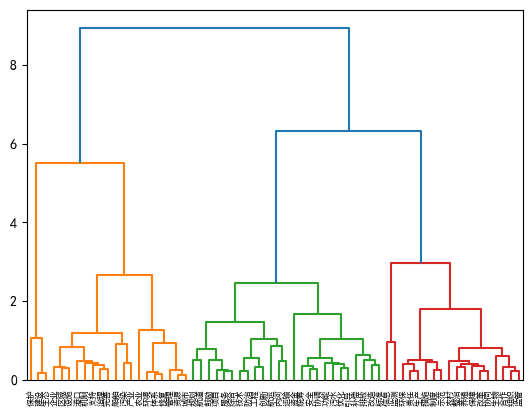

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
k=sch.dendrogram(Z,labels=word_all.关键词.values)


In [40]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
clustering = ac.fit(p)

In [41]:
print("每个数据所属的簇编号", clustering.labels_)
print("每个簇的成员", clustering.children_)

每个数据所属的簇编号 [2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 3]
每个簇的成员 [[ 17  18]
 [ 19  20]
 [  0   1]
 [ 16  65]
 [ 26  30]
 [ 34  42]
 [ 37  38]
 [ 15  64]
 [ 29  32]
 [ 49  55]
 [ 33  44]
 [ 28  72]
 [  6  11]
 [ 43  46]
 [ 35  70]
 [ 12  14]
 [ 51  52]
 [ 23  68]
 [ 39  73]
 [ 36  61]
 [ 13  79]
 [ 40  77]
 [ 69  74]
 [ 10  76]
 [ 82  83]
 [ 80  85]
 [ 45  47]
 [ 48  86]
 [  4  87]
 [ 60  78]
 [ 54  89]
 [ 31  88]
 [  5   9]
 [  8  92]
 [ 27  75]
 [ 21  81]
 [ 62  94]
 [ 53  90]
 [ 57  58]
 [ 22  99]
 [ 93  95]
 [ 84  97]
 [100 101]
 [ 67  71]
 [ 25 104]
 [ 41  98]
 [102 106]
 [ 24 109]
 [ 91 103]
 [ 96 105]
 [ 59 112]
 [110 111]
 [  3 113]
 [114 115]
 [  2  66]
 [ 50  56]
 [  7 107]
 [116 120]
 [108 117]
 [121 122]
 [ 63 123]
 [118 119]
 [124 125]]


In [42]:
pd.set_option('display.max_rows', None)

In [43]:
word_all.iloc[np.where(clustering.labels_==0)[0],0].values

array(['船舶', '机制', '污染', '治理', '农业', '港口', '产业', '支持', '完善', '区域', '企业',
       '设施', '管理', '环境', '资源', '城市', '体系', '修复', '工程', '规划', '创新', '航道',
       '生物', '技术', '鼓励', '项目', '服务', '防治', '农村', '综合', '制度', '责任', '合作',
       '整治', '组织', '监管', '保障', '统筹', '补偿', '生产', '安全', '示范', '改造', '协调',
       '标准', '环保', '改革', '优化', '引导', '排放', '污水', '协同', '内河', '运输', '航运',
       '措施', '养殖', '功能'], dtype=object)

In [44]:
word_all.iloc[np.where(clustering.labels_==1)[0],0].values

array(['信息', '监测'], dtype=object)

In [45]:
word_all.iloc[np.where(clustering.labels_==2)[0],0].values

array(['建设', '生态', '保护'], dtype=object)

In [46]:
word_all.iloc[np.where(clustering.labels_==3)[0],0].values

array(['资金'], dtype=object)